# Approach to loan prediction
    Import all the necessary liabraries
    Load and audit the data
    Data Preparation and Data Transformation
        Missing value: Impute all missing values using mean, median and mode
        Inconsistent Values: Replace all inconsistencies with consistent values
        Outliers: Transform or let the algoritm deal
    Data Visualisation
    Data Analysis
        Univariate(Mean,median, Mode)
        Bi-variate(Covariance, Correaltion, Chi-squared)
        Multi variate
            regression: Not a regression problem
            Classifiaction: Since the outcome is YES or NO
            Apply ML Models
            Evaluate between Logistic and Decision Tree wich is the better model

<h2>Problem</h2>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

<h3>Dataset Description:</h3>
    <ul>
    <b>Variable           -Description</b>
    <li>Loan_ID	            -Unique Loan ID</li>
    <li>Gender	            -Male/ Female</li>
    <li>Married	            -Applicant married (Y/N)</li>
    <li>Dependents	        -Number of dependents</li>
    <li>Education	        -Applicant Education (Graduate/ Under Graduate)</li>
    <li>Self_Employed	    -Self employed (Y/N)</li>
    <li>ApplicantIncome	    -Applicant income</li>
    <li>CoapplicantIncome	-Coapplicant income</li>
    <li>LoanAmount	        -Loan amount in thousands</li>
    <li>Loan_Amount_Term	-Term of loan in months</li>
    <li>Credit_History	    -credit history meets guidelines</li>
    <li>Property_Area	    -Urban/ Semi Urban/ Rural</li>
    <li>Loan_Status	        -Loan approved (Y/N)</li>

### Import Libraries

In [1]:
!pip install imblearn
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
pd.set_option('display.max_column',None)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import pickle
import gradio as gr
import warnings
warnings.filterwarnings("ignore")

### Load the data set

In [3]:
train=pd.read_csv("/content/loan_sanction_train.csv")

### Audit the Data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.select_dtypes(include=np.number).skew()

,0
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.677552
Loan_Amount_Term,-2.362414
Credit_History,-1.882361


* skew(): This method calculates the skewness of each numerical column in the DataFrame. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable. In simpler terms, it indicates whether the data is skewed to the left (negative skew) or to the right (positive skew).

### Data Prep

In [8]:
def data_prep(data):
    data['Gender']=np.where(data['Gender'].isna(),data['Gender'].mode(dropna=True),data['Gender'])
    data['Married']=np.where(data['Married'].isna(),data['Married'].mode(dropna=True),data['Married'])
    data['Dependents'].replace('3+','3',inplace=True)
    data['Dependents']=np.where(data['Dependents'].isna(),data['Dependents'].mode(dropna=True),data['Dependents'])
    data['Dependents']=data['Dependents'].astype('int')
    data['Education']=np.where(data['Education'].isna(),data['Education'].mode(dropna=True),data['Education'])
    data['Self_Employed']=np.where(data['Self_Employed'].isna(),data['Self_Employed'].mode(dropna=True),data['Self_Employed'])
    data['Credit_History']=np.where(data['Credit_History'].isna(),data['Credit_History'].mode(dropna=True),data['Credit_History'])

    for i in data.columns:
        if data[i].dtype=='float' or data[i].dtype=='int' :
            data[i]=np.where(data[i].isna(),data[i].median(),data[i])
    return data

In [9]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


### Label encoding the object features

In [10]:
def encode(data):
    le=LabelEncoder()
    for i in data.columns:
        if data[i].dtype=='object':
            data[i]=le.fit_transform(data[i])
    return data

In [11]:
encode(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0.0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3.0,0,0,4106.0,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1.0,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2.0,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 62.5 KB


### Visualizations

<Axes: xlabel='Gender'>

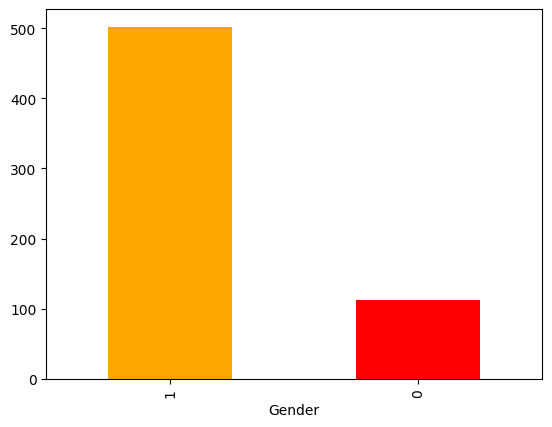

In [13]:
train['Gender'].value_counts().plot(kind='bar',color=['orange','red'])

From the above plot We can see that mostly male are opting for loan

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

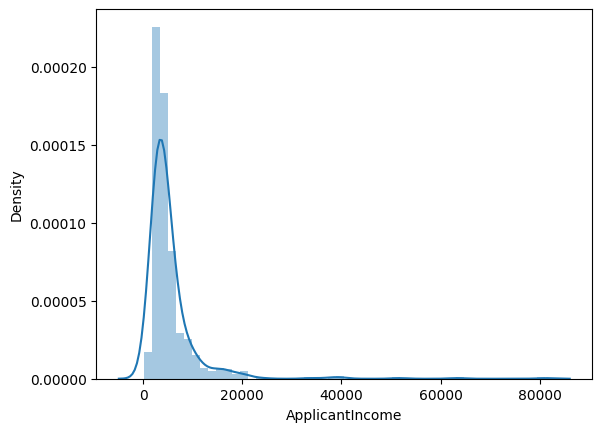

In [14]:
sns.distplot(train['ApplicantIncome'])

<Axes: xlabel='Gender'>

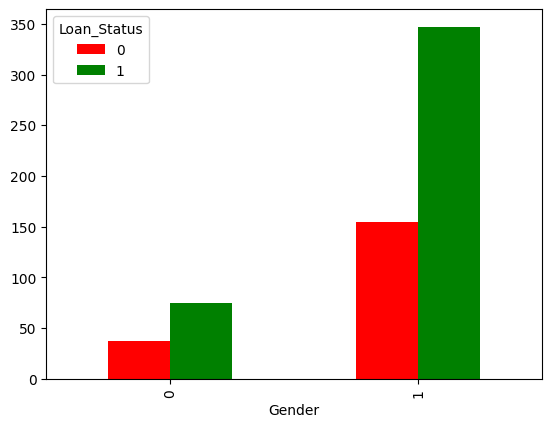

In [15]:
pd.crosstab(train['Gender'],train['Loan_Status']).plot(kind='bar',color=['r','g'])

Nearly 50% of the women candidates applied for loan has been rejected and above 50% of the male's loan got sanctioned

<Axes: xlabel='Credit_History'>

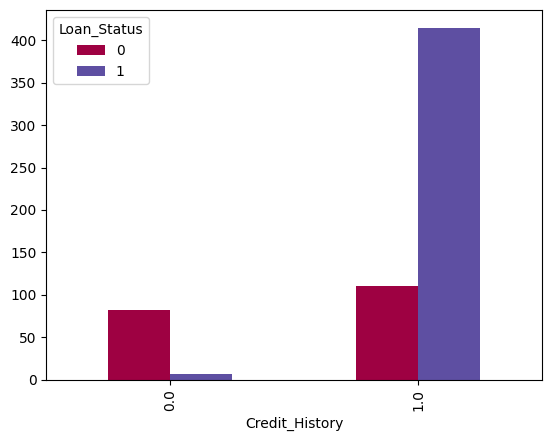

In [16]:
pd.crosstab(train['Credit_History'],train['Loan_Status']).plot(kind='bar',colormap='Spectral')

Its clearly visible that there are less chance of rejection if you have credit history in the past

<Axes: ylabel='count'>

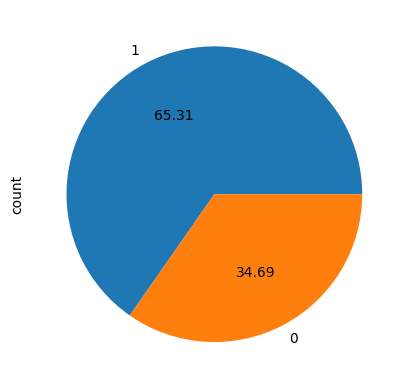

In [17]:
train['Married'].value_counts().plot(kind='pie',autopct='%.2f')

Most of the married people applies loan

<Axes: xlabel='Self_Employed'>

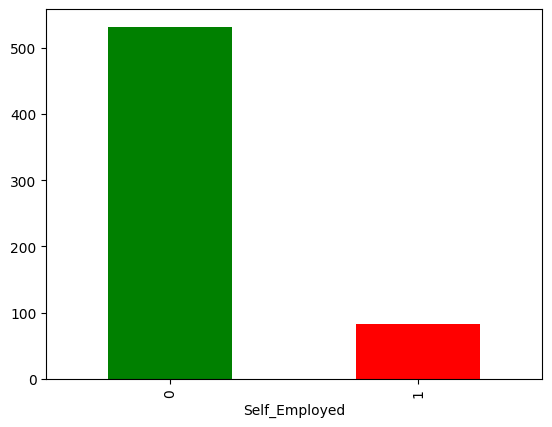

In [18]:
(train['Self_Employed'].value_counts()).plot(kind='bar',color=['green','red'])

Only less amount of the self employed people Opting for loan, as self-emploed people might have a enough income to live their life

<Axes: ylabel='count'>

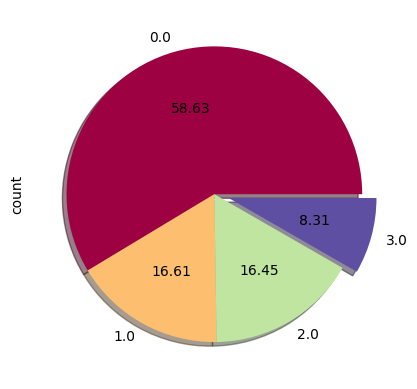

In [19]:
train['Dependents'].value_counts().plot(kind='pie',autopct='%.2f',
                                        colormap='Spectral',shadow=1,explode=[0,0,0,0.1])

In [20]:
train.drop(['Loan_ID'],inplace=True,axis=1)

### Outlier analysis

(array([1, 2, 3]),
 [Text(1, 0, 'ApplicantIncome'),
  Text(2, 0, 'CoapplicantIncome'),
  Text(3, 0, 'LoanAmount')])

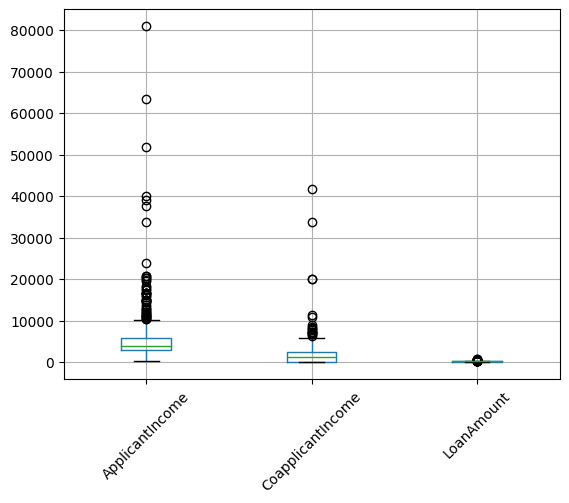

In [21]:
train[['ApplicantIncome','CoapplicantIncome','LoanAmount']].boxplot()
plt.xticks(rotation=45)

### Cube Transformation of outliers

In [22]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    if train[i].skew()>0.5 or train[i].skew()<-0.65:
        train[i]=np.cbrt(train[i])

In [23]:
train[['ApplicantIncome','CoapplicantIncome','LoanAmount']].skew()

,0
ApplicantIncome,2.083638
CoapplicantIncome,0.196726
LoanAmount,0.862715


Outliers has reduced to a great extinct

* The Cube Transformation is a mathematical technique used to transform data to reduce skewness and handle outliers. It involves raising each data point to the power of 1/3 (i.e., taking the cube root) to achieve a more normal distribution. This transformation can help stabilize the variance and make the data more suitable for various statistical analyses and machine learning models.

* Why Use Cube Transformation?
* Reducing Skewness: It can reduce the impact of skewed data by bringing outliers closer to the mean.
* Handling Outliers: It diminishes the influence of extreme values, making the data less sensitive to outliers.
* Improving Normality: It can help make the data distribution closer to a normal distribution, which is often an assumption in many statistical methods.

### Bivariate for Continues variable

<Axes: >

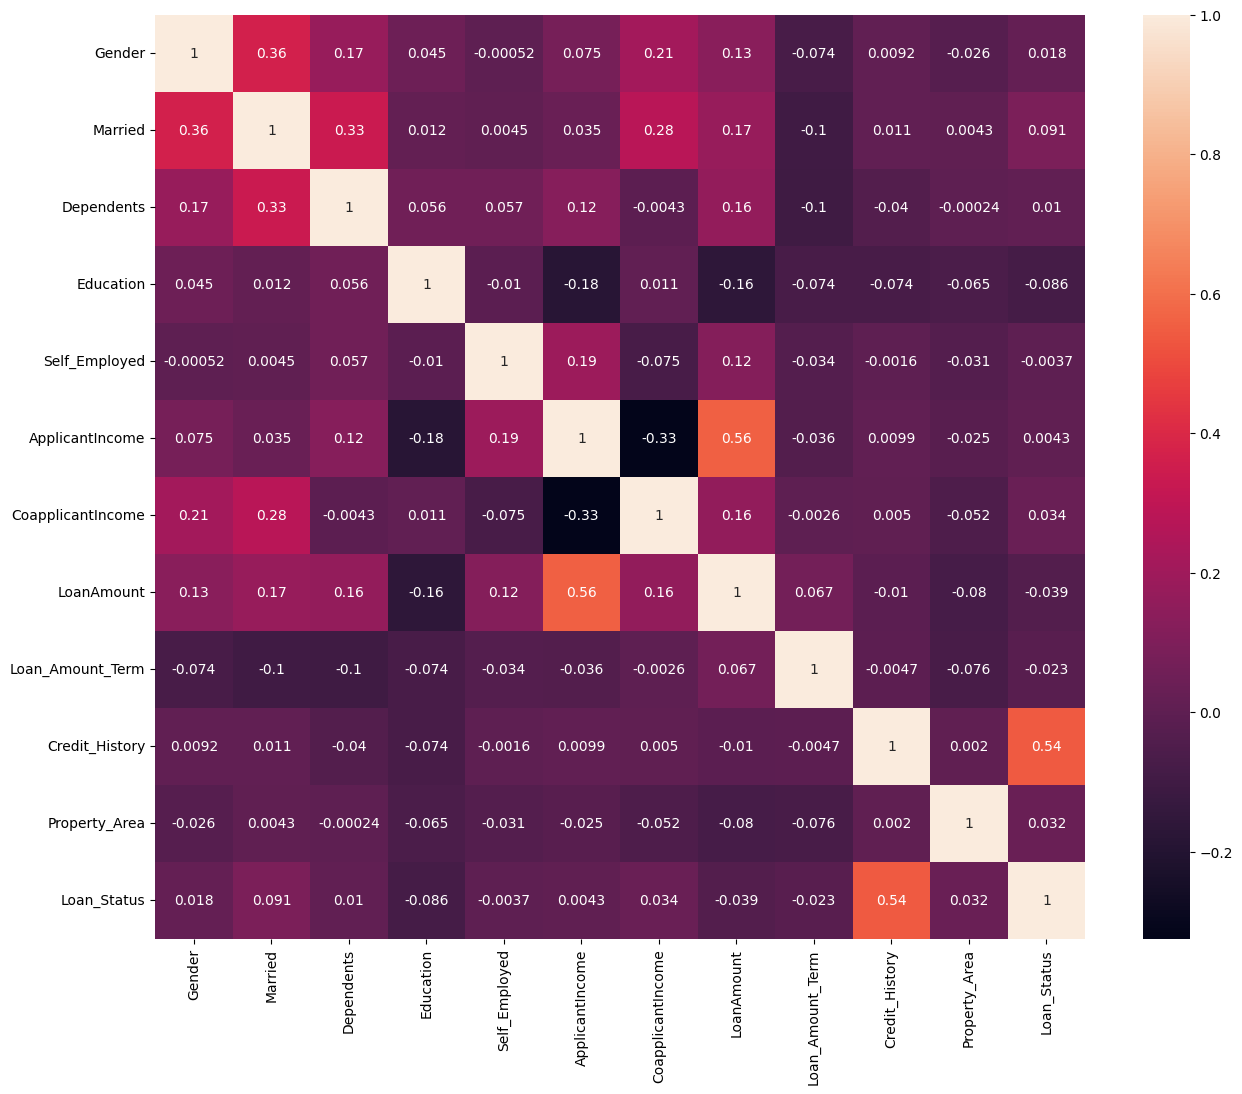

In [24]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),annot=True)

### Splitting independent and Dependent feature

In [25]:
x=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

* SMOTE (Synthetic Minority Over-sampling Technique) is a powerful technique used to handle imbalanced datasets, where the number of instances in different classes is significantly disproportionate. It generates synthetic samples for the minority class to balance the dataset, improving the performance of machine learning models.

* How SMOTE Works
Identify Minority Class Samples: SMOTE starts by identifying the samples in the minority class.
Find Nearest Neighbors: For each minority class sample, SMOTE selects one or more of its nearest neighbors.
Generate Synthetic Samples: New synthetic samples are generated by interpolating between the selected sample and its neighbors. This is done by randomly choosing a point along the line segment that connects the two samples in the feature space.
* Why Use SMOTE?
Improves Model Performance: Balances the dataset, which helps machine learning models learn more effectively and reduces bias towards the majority class.
Prevents Overfitting: Unlike simple over-sampling (duplicating minority samples), SMOTE generates new, diverse examples, which can help prevent overfitting.

### SMOTE for imbalenced Data

In [26]:
x.shape

(614, 11)

In [27]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [28]:
x.shape

(844, 11)

In [29]:
y.shape

(844,)

### Train test Split

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

In [31]:
print(xtest.shape,
ytest.shape,
xtrain.shape,
ytrain.shape)

(169, 11) (169,) (675, 11) (675,)


### Scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
xtrain=std.fit_transform(xtrain)
def scaling(x):
    return std.transform(x)

In [33]:
xtest=scaling(xtest)

### Predifined Function

In [34]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

### Logistic Regression

In [35]:
log=LogisticRegression()
log.fit(xtrain,ytrain)
preds_ytrain_log=log.predict(xtrain)
preds_ytest_log=log.predict(xtest)
report(ytrain,preds_ytrain_log)
report(ytest,preds_ytest_log)

Accuracy of model is 75.26 %

  [[192 147]
 [ 20 316]]

               precision    recall  f1-score   support

           0       0.91      0.57      0.70       339
           1       0.68      0.94      0.79       336

    accuracy                           0.75       675
   macro avg       0.79      0.75      0.74       675
weighted avg       0.79      0.75      0.74       675

Accuracy of model is 75.74 %

  [[45 38]
 [ 3 83]]

               precision    recall  f1-score   support

           0       0.94      0.54      0.69        83
           1       0.69      0.97      0.80        86

    accuracy                           0.76       169
   macro avg       0.81      0.75      0.74       169
weighted avg       0.81      0.76      0.75       169



### Random Forest

In [36]:
dt=DecisionTreeClassifier(max_depth=7,min_samples_split=20,min_samples_leaf=10)
dt.fit(xtrain,ytrain)
preds_xtrain_dt=dt.predict(xtrain)
preds_xtest_dt=dt.predict(xtest)
report(ytrain,preds_xtrain_dt)
report(ytest,preds_xtest_dt)

Accuracy of model is 83.26 %

  [[266  73]
 [ 40 296]]

               precision    recall  f1-score   support

           0       0.87      0.78      0.82       339
           1       0.80      0.88      0.84       336

    accuracy                           0.83       675
   macro avg       0.84      0.83      0.83       675
weighted avg       0.84      0.83      0.83       675

Accuracy of model is 78.11 %

  [[59 24]
 [13 73]]

               precision    recall  f1-score   support

           0       0.82      0.71      0.76        83
           1       0.75      0.85      0.80        86

    accuracy                           0.78       169
   macro avg       0.79      0.78      0.78       169
weighted avg       0.79      0.78      0.78       169



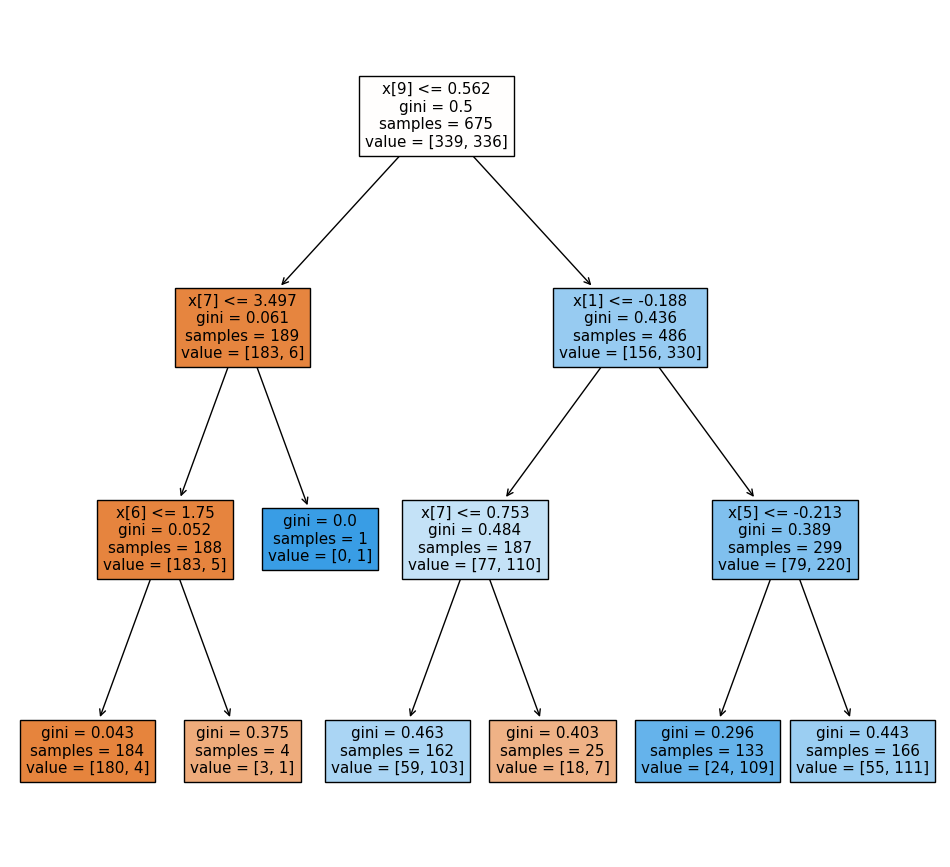

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,11))
clf=DecisionTreeClassifier(max_depth=3).fit(xtrain,ytrain)
plot_tree(clf,filled=True)
plt.show()

### Random Forest

In [38]:
rf=RandomForestClassifier(n_estimators=150,max_depth=17,
                          min_samples_leaf=10,min_samples_split=9)
rf.fit(xtrain,ytrain)
preds_xtrain_rf=rf.predict(xtrain)
preds_xtest_rf=rf.predict(xtest)
report(ytrain,preds_xtrain_rf)
report(ytest,preds_xtest_rf)

Accuracy of model is 83.26 %

  [[237 102]
 [ 11 325]]

               precision    recall  f1-score   support

           0       0.96      0.70      0.81       339
           1       0.76      0.97      0.85       336

    accuracy                           0.83       675
   macro avg       0.86      0.83      0.83       675
weighted avg       0.86      0.83      0.83       675

Accuracy of model is 75.15 %

  [[45 38]
 [ 4 82]]

               precision    recall  f1-score   support

           0       0.92      0.54      0.68        83
           1       0.68      0.95      0.80        86

    accuracy                           0.75       169
   macro avg       0.80      0.75      0.74       169
weighted avg       0.80      0.75      0.74       169



### Test Data

In [39]:
test=pd.read_csv("/content/loan_sanction_test.csv")

In [40]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [42]:
data_prep(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009.0,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158.0,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250.0,1993.0,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000.0,2393.0,158.0,360.0,1.0,Rural


In [43]:
encode(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0.0,0,0,5720.0,0.0,110.0,360.0,1.0,2
1,1,1,1,1.0,0,0,3076.0,1500.0,126.0,360.0,1.0,2
2,2,1,1,2.0,0,0,5000.0,1800.0,208.0,360.0,1.0,2
3,3,1,1,2.0,0,0,2340.0,2546.0,100.0,360.0,1.0,2
4,4,1,0,0.0,1,0,3276.0,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3.0,1,1,4009.0,1777.0,113.0,360.0,1.0,2
363,363,1,1,0.0,0,0,4158.0,709.0,115.0,360.0,1.0,2
364,364,1,0,0.0,0,0,3250.0,1993.0,126.0,360.0,1.0,1
365,365,1,1,0.0,0,0,5000.0,2393.0,158.0,360.0,1.0,0


In [44]:
test.drop(['Loan_ID'],axis=1,inplace=True)

In [45]:
test=scaling(test)

### Predicting Test Data

In [46]:
test_pred_log=log.predict(test)
dt_pred=dt.predict(test)
rf_pred=rf.predict(test)

### Dumping the best model using Pickel

In [47]:
with open('random_forest1.pkl','wb') as f:
    pickle.dump(rf,f)

In [48]:
def make_prediction(Gender, Married, Dependents, Education, Self_Employed,
       ApplicantIncome, CoapplicantIncome, LoanAmount,
       Loan_Amount_Term, Credit_History, Property_Area):
    with open('random_forest1.pkl','rb') as f:
        clf=pickle.load(f)
        li_1=scaling([[Gender, Married, Dependents, Education, Self_Employed,
       np.cbrt(ApplicantIncome), np.cbrt(CoapplicantIncome), np.cbrt(LoanAmount),
       Loan_Amount_Term, Credit_History, Property_Area]])
        print(li_1)
        preds=clf.predict(li_1)
        if preds==0:
            return 'Will not get Loan'
        else:
            return 'Will Get Loan'

### Defining input fields and type

In [49]:
Gender=gr.Number(label='Enter Gender')
Married=gr.Number(label='Enter Married')
Dependents=gr.Number(label='Enter Dependents')
Education=gr.Number(label='Enter Education')
Self_Employed=gr.Number(label='Enter self-employed')
ApplicantIncome=gr.Number(label='Enter Applicant income')
CoapplicantIncome=gr.Number(label='Enter Coapplicant income')
LoanAmount=gr.Number(label='Enter Loan amount')
Loan_Amount_Term=gr.Number(label='Enter Loan amount term')
Credit_History=gr.Number(label='Enter Credit history')
Property_Area=gr.Number(label='Enter property area')
output=gr.Textbox()

In [50]:
app=gr.Interface(fn=make_prediction,inputs=[Gender, Married, Dependents, Education, Self_Employed,
       ApplicantIncome, CoapplicantIncome, LoanAmount,
       Loan_Amount_Term, Credit_History, Property_Area],outputs=output)
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f5d035ffce82b85d2a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### Gradio UI output

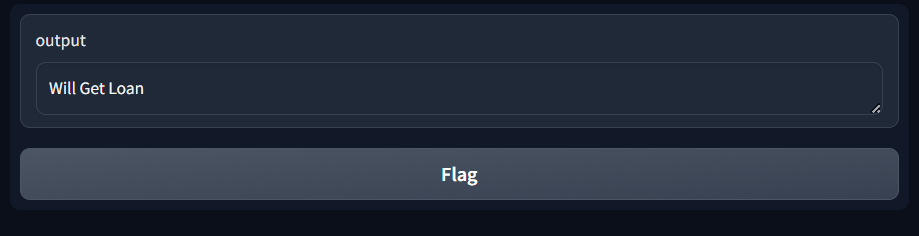